#Directory

In [1]:
%cd /content/drive/MyDrive/Data Mining for Business in Python/1. Survival Analysis

/content/drive/MyDrive/Data Mining for Business in Python/1. Survival Analysis


#Libraries

In [2]:
!pip install lifelines

     |████████████████████████████████| 358kB 7.8MB/s 
     |████████████████████████████████| 61kB 7.5MB/s 
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-cp37-none-any.whl size=4050 sha256=edc24bb4d43055eb5e2ef12757ed571e786fd3a1864ad05d4d2f76600f389174
  Stored in directory: /root/.cache/pip/wheels/dc/68/dc/91321c55fba449755524481854f5be70d41912b8f886f908bb
Successfully built autograd-gamma


In [3]:
import pandas as pd

#Data

In [4]:
#import dataset
dataset = pd.read_csv("solder.csv")
dataset.head()  

,Opening,Solder,Mask,PadType,Panel,skips
0,L,Thick,A1.5,W4,1,0
1,L,Thick,A1.5,W4,2,0
2,L,Thick,A1.5,W4,3,0
3,L,Thick,A1.5,D4,1,0
4,L,Thick,A1.5,D4,2,0


In [5]:
#transform survival variable
import numpy as np
dataset["Solder"] = np.where(dataset["Solder"] == "Thin", 1, 0)
dataset.head()

,Opening,Solder,Mask,PadType,Panel,skips
0,L,0,A1.5,W4,1,0
1,L,0,A1.5,W4,2,0
2,L,0,A1.5,W4,3,0
3,L,0,A1.5,D4,1,0
4,L,0,A1.5,D4,2,0


#Kaplan-Meier Estimator

In [6]:
#KME
from lifelines import KaplanMeierFitter
model = KaplanMeierFitter()
model.fit(durations = dataset.skips,
          event_observed = dataset.Solder)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 900 total observations, 450 right-censored observations>

Text(0.5, 0, 'Skips')

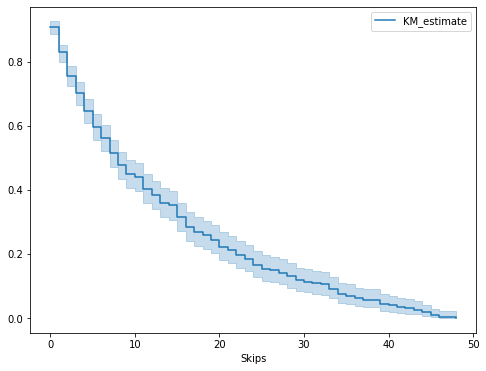

In [7]:
#visuliazation
import matplotlib.pyplot as plt
model.plot(figsize = (8,6))
plt.xlabel("Skips")

In [8]:
dataset.Panel.unique()

array([1, 2, 3])

#Log Rank Test

In [9]:
from lifelines.statistics import multivariate_logrank_test
multivariate_logrank_test(dataset.skips,
                          dataset.Panel,
                          dataset.Solder)

<lifelines.StatisticalResult: multivariate_logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 2
         test_name = multivariate_logrank_test

---
 test_statistic    p  -log2(p)
           6.84 0.03      4.93